In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cgi import test
from sklearn.model_selection import train_test_split

In [2]:
# Creating a pandas df of the radar parameters in the csv file given
radar_params = pd.read_csv('homework/radar_parameters.csv', index_col=0, header=0)

In [3]:
radar_params

,Zh (dBZ),Zdr (dB),Ldr (dB),Kdp (deg km-1),Ah (dBZ/km),Adr (dB/km),R (mm/hr)
0,23.144878,0.418637,-41.757733,0.005395,0.000290,0.000012,2.393520
1,22.737156,0.322850,-43.772069,0.005194,0.000360,0.000012,3.502699
2,26.869826,0.330948,-43.577399,0.013385,0.000903,0.000030,8.627561
3,28.540561,0.399480,-42.139731,0.018872,0.001036,0.000043,8.424447
4,30.500127,0.543758,-39.763087,0.027438,0.001157,0.000064,8.189291
...,...,...,...,...,...,...,...
18964,31.515997,0.579955,-39.244229,0.034048,0.001417,0.000080,10.648020
18965,29.993334,0.567935,-39.399188,0.024134,0.001032,0.000057,7.981875
18966,31.685913,0.655681,-38.375696,0.033971,0.001165,0.000081,6.822691
18967,32.980096,0.768586,-37.166218,0.043117,0.001285,0.000105,6.801169


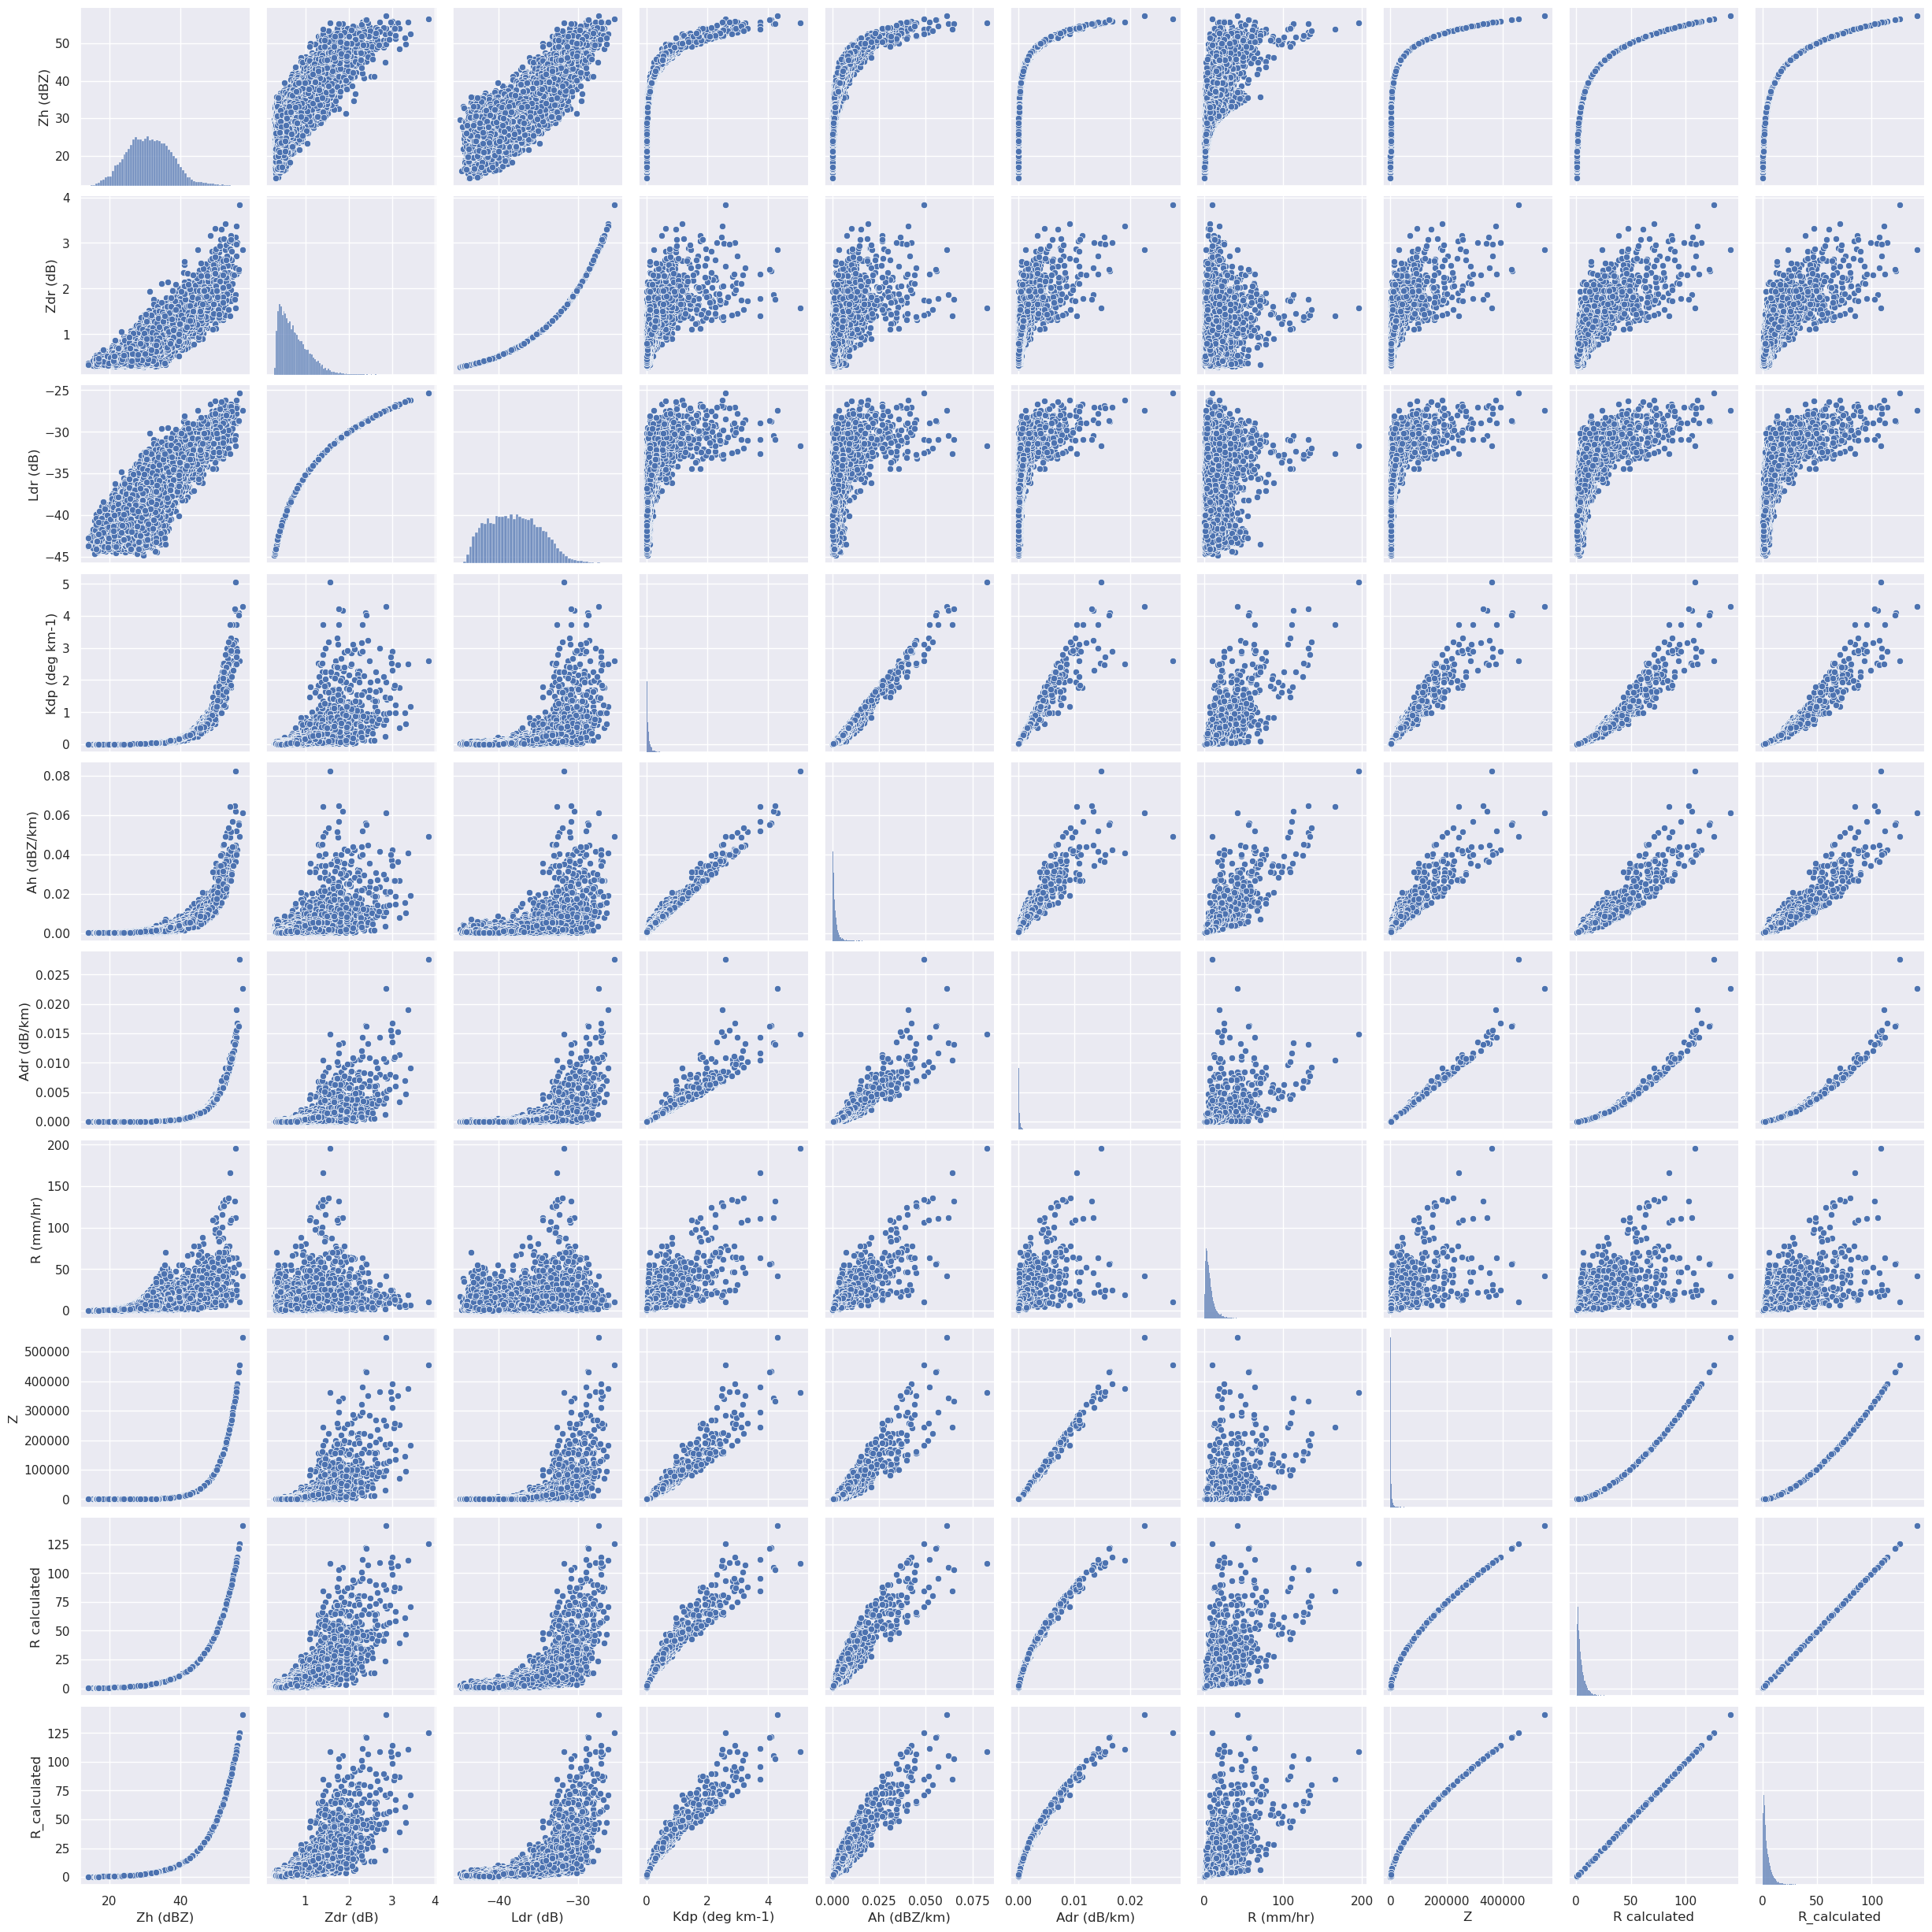

In [21]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(radar_params) # Gives us a quick visualization of the data

1. Split the data into a 70-30 split for training and testing data.

In [5]:
# Features usually called X
# The features are radar refelctivity factor, differential reflectivity, linear
# depolarization ratio, specific differential phase, specific attenuation, and 
# differential attenuation
x_radar_params = radar_params.drop('R (mm/hr)', axis=1)
x_radar_params.shape

(18969, 6)

In [9]:
# Target usually called y
# The target is rain rate
y_radar_params = radar_params['R (mm/hr)']
y_radar_params.shape

(18969,)

In [10]:
# This sets up the data that will be trained and tested for both the features and the
# target variable (70-30 split)
xtrain, xtest, ytrain, ytest = train_test_split(x_radar_params, y_radar_params,
    random_state=1, train_size=.7, test_size=.3)

/data/keeling/a/leanneb2/miniconda3/envs/ml_intro/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [19]:
# Checking that the test data is 30% of the total and the training data is 70% (out of 18969)
print(x_radar_params.shape)
print(xtrain.shape)
print(xtest.shape)

(18969, 6)
(13278, 6)
(5691, 6)


2. Using the split created in (1), train a multiple linear regression dataset using the training dataset, and validate it using the testing dataset.  Compare the $R^2$ and root mean square errors of model on the training and testing sets to a baseline prediction of rain rate using the formula $Z = 200 R^{1.6}$.

In [ ]:
# Calculates z and r, which are to be converted into a column in the pandas df
z = 10.**((radar_params['Zh (dBZ)'])/10.)
r = (z/200.)**(1/1.6)

# Creating columns in the df to store the z and r calculated above
radar_params['Z'] = z
radar_params['R_calculated'] = r  # rain rate